In [71]:
# local에 padnas, numpy, matplotlib 설치필요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Amazon Data

**1-1. Used Data**

*   https://amazon-reviews-2023.github.io/






In [72]:
def preprocess_review(review_path):
    try:
      review_df = pd.read_json(review_path,lines=True)
      filtered_review_df = review_df[["asin", "rating", "user_id", "title", "category"]]
      distinct_review_df = filtered_review_df.drop_duplicates(subset=["user_id", "asin"])
      return distinct_review_df
    except Exception as e:
        print(f"Error in preprocess_review: {e}")
        raise

In [73]:
import os

# 로컬 파일 경로 지정
review_path = os.path.abspath("./Data/Amazon/Review/combined_data2.json")
review_df = preprocess_review(review_path)

In [74]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74394 entries, 0 to 77188
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   asin      74394 non-null  object
 1   rating    74394 non-null  int64 
 2   user_id   74394 non-null  object
 3   title     74394 non-null  object
 4   category  74394 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [75]:
# object 타입 컬럼에 대해 요약 통계 계산
review_df[["asin","user_id","title","category"]].describe()

,asin,user_id,title,category
count,74394,74394,74394,74394
unique,59136,21567,51940,10
top,B079TRNVHX,AFZUK3MTBIBEDQOPAK3OATUOUKLA,Five Stars,Movies_TV
freq,1044,942,5407,9998


In [76]:
# float64 타입 컬럼에 대해 요약 통계 계산
review_df[["rating"]].describe()

,rating
count,74394.000000
mean,4.216644
std,1.249528
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [77]:
popular_items = (
    review_df.groupby(["asin","category"])["user_id"]
    .count()
    .reset_index(name="num_reviews")
    .sort_values(by="num_reviews", ascending=False)
)

# 상위 30개의 결과 출력
print("상위 30개의 인기 아이템:")
print(popular_items.head(30))

상위 30개의 인기 아이템:
             asin              category  num_reviews
38730  B079TRNVHX  Grocery_Gourmet_Food         1044
45689  B07T771SPH              Software          103
21017  B00KDSGIPK              Software           88
12704  B005ZXWMUS              Software           84
15151  B0094BB4TW              Software           82
27360  B017250D16              Software           79
18587  B00FAPF5U0              Software           74
33400  B01N0BP507              Software           68
22794  B00P03D4D2              Software           67
22095  B00N28818A              Software           60
14942  B008XG1X18              Software           60
27864  B018IOV40E              Software           46
21671  B00LV4D70O              Software           45
12765  B0063IH60K              Software           44
32364  B01LXZLEMN              Software           42
12836  B0066TUXU6              Software           40
25924  B01248YO8E              Software           39
14668  B008K6HN8I             

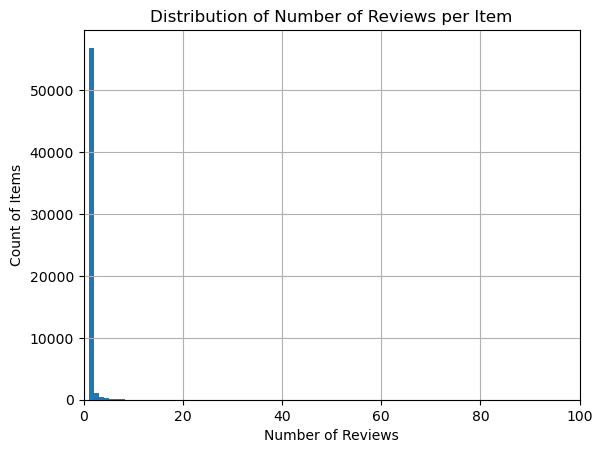

In [78]:
popular_items['num_reviews'].hist(bins=1000)
plt.title("Distribution of Number of Reviews per Item")
plt.xlim(0, 100)
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Items")
plt.show()

In [79]:
# user_id별 asin 개수를 집계하고 num_reviews 컬럼으로 이름 설정
user_activity_df = (
    review_df.groupby("user_id")["asin"]
    .count()
    .reset_index(name="num_reviews")
    .sort_values(by="num_reviews", ascending=False)
)

# 상위 20개 결과 출력
print("상위 20명의 사용자 활동:")
print(user_activity_df.head(20))


상위 20명의 사용자 활동:
                            user_id  num_reviews
10644  AFZUK3MTBIBEDQOPAK3OATUOUKLA          942
11550  AG73BVBKUOH22USSFJA5ZWL7AKXA          563
7914   AFJBKPK5W56XWSNPQU2WW66ISWYQ          535
20762  AHV6QCNBJNSGLATP56JAWJ3C4G2A          532
10218  AFXF3EGQTQDXMRLDWFU7UBFQZB7Q          511
19818  AHPOHKN4PU4W3V5PGFL7AGTAD2AA          453
16185  AGZZXSMMS4WRHHJRBUJZI4FZDHKQ          396
8129   AFKMX6JZ655VPVYHBTATZQS4IBOQ          343
9155   AFQQQ5LGNSQUEBGDCYBAZZE5T3DA          327
8343   AFLX66DKF6R3H6OEOC3TIVAYXZIQ          256
15122  AGTMZCWIWBH43TCW7UKG2YV2EKKA          248
15019  AGSXMEKFKM2HDFZ4UNE676O6D5LQ          247
17413  AHBCXD3IW2OEP3JZXKKEWCAQWYRQ          246
10953  AG3S4FROO422V5KP7DJCBXVUQLJQ          244
17340  AHATA6X6MYTC3VNBFJ3WIYVK257A          219
7354   AFFZVSTUS3U2ZD22A2NPZSKOCPGQ          210
5376   AF2BLE54TEMGZ546U763ZHZRXC4A          207
19780  AHPFHP43AXWRYZZ4HPNCW7I7J3ZQ          197
10257  AFXMJCVLRCGRAEC7P37FZHEB24UQ          196
2056

In [80]:
# rating별 개수를 집계하고 정렬
rating_counts = (
    review_df.groupby("rating")
    .size()  # 각 그룹의 개수를 계산
    .reset_index(name="count")  # 결과를 데이터프레임으로 변환
    .sort_values(by="rating")  # rating 기준으로 정렬
)

# 결과 출력
print("rating별 리뷰 개수:")
print(rating_counts)

rating별 리뷰 개수:
   rating  count
0       1   5804
1       2   3563
2       3   6250
3       4  11872
4       5  46905


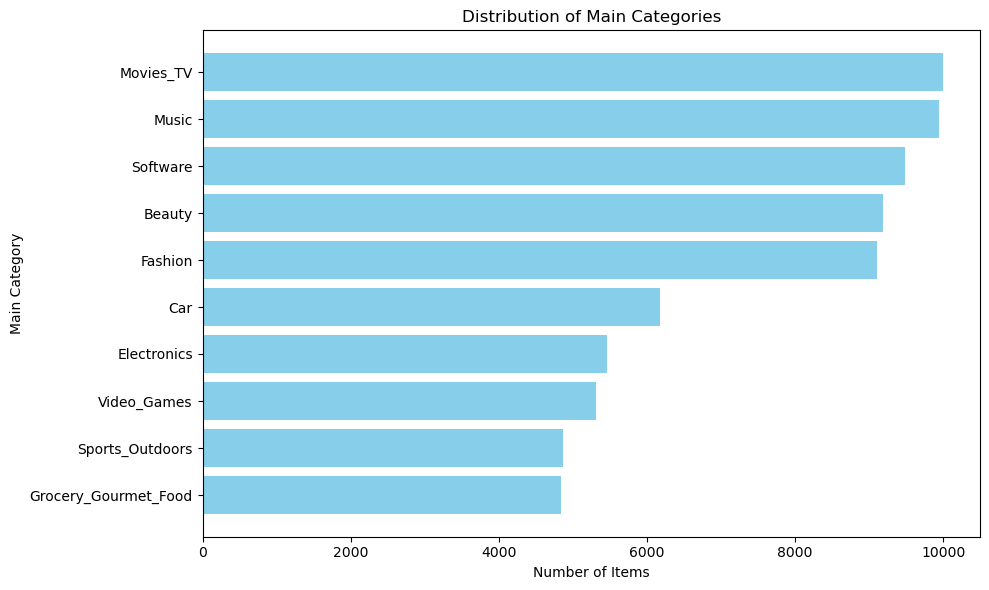

In [81]:
def visualize_category_distribution(result_df):
    """
    result_df에서 고유한 category의 분포를 시각화.
    """
    # 카테고리별 개수 집계 및 정렬
    category_counts = (
        result_df.groupby("category")
        .size()
        .reset_index(name="count")
        .sort_values(by="count", ascending=False)
    )

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(category_counts["category"], category_counts["count"], color="skyblue")
    plt.xlabel("Number of Items")
    plt.ylabel("Main Category")
    plt.title("Distribution of Main Categories")
    plt.gca().invert_yaxis()  # 카테고리를 내림차순으로 정렬
    plt.tight_layout()
    plt.show()

# 함수 호출
visualize_category_distribution(review_df)